#**Movie Analysis**

###BUDT737: Enterprise Cloud Computing and Big Data
#### Team Members : Jainam Chhadwa, Hitaishi Joshi, Krupa Shah

In [ ]:
!pip install pyspark

In [ ]:
!pip install graphframes

In [ ]:
from pyspark.sql.functions import when, col, mean

In [ ]:
#Installing the necessary libraries
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://bitbucket.org/habedi/datasets/raw/b6769c4664e7ff68b001e2f43bc517888cbe3642/spark/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!rm -rf spark-3.0.2-bin-hadoop2.7.tgz*
!pip -q install findspark pyspark graphframes

In [ ]:
from pyspark.sql import SparkSession
session= SparkSession.builder.appName("examplefeature").getOrCreate()

In [ ]:
data=session.read.csv('/content/movie_training (1).csv', header=True, inferSchema=True)

In [ ]:
print("Number of observations:",data.count())
print("Information of columns:\n",data.columns)
print("Description of columns:\n",data.describe().show())
print("First few records:\n", data.show())

Number of observations: 3597
Information of columns:
 ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes', 'IMDB_user_reviews', 'IMDB_user_votes', 'IMDB_score']
+-------+----------------+-------------+----------------------+------------------+-----------------------+----------------------+-------------+----------------------+--------------------+-------+-------------+-----------------+-------------------------+-------------+--------------------+--------------------+--------------------+----------+--------------------+--------------+--------------------+------------------+----------------------+------

#**Cleaning**

#Adding imdb_high column



Here we create a new column in our DataFrame called "IMDB_high". Here, we assign a value of 1 to each row where the "IMDB_score" is 7 or higher, indicating a high IMDb score, while assigning a value of 0 otherwise. This new column acts as a binary indicator, helping us to discern whether a movie boasts a high IMDb score or not. This enhancement aids us in conducting further analysis and classification tasks based on IMDb ratings.

In [ ]:
data = data.withColumn("IMDB_high", when(data["IMDB_score"] >= 7, 1).otherwise(0))

In [ ]:
data.show()

+-----+------------------+----------------------+--------+-----------------------+----------------------+--------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+----------------+--------------------+--------------------+--------------------+--------+-------+--------------+---------+----------+----------------------+------------+--------------------+-----------------+---------------+----------+---------+
|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_3_facebook_likes|        actor_2_name|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|    actor_3_name|facenumber_in_poster|       plot_keywords|     movie_imdb_link|language|country|content_rating|   budget|title_year|actor_2_facebook_likes|aspect_ratio|movie_facebook_likes|IMDB_user_reviews|IMDB_user_votes|IMDB_score|IMDB_high|
+-----+---------------

#Target variable = Null

Here we're preparing our dataset by removing any rows where the target variable, "IMDB_score", is null or missing values. This ensures that our analysis is based only on complete and valid data. Then, we select specific columns from the dataset that are relevant for our analysis, such as movie details like director's name, duration, actor information, and IMDb ratings. Finally, we display the cleaned DataFrame to review the changes and ensure that it contains the necessary columns for our analysis. This process helps us focus on relevant data and ensures the quality of our analysis.

In [ ]:
data = data.filter(data["IMDB_score"].isNotNull())

data = data.select("IMDB_high","color","director_name","num_critic_for_reviews","duration","director_facebook_likes","actor_1_facebook_likes","gross","genres","actor_1_name","movie_title","cast_total_facebook_likes","language","country","content_rating","budget","title_year","IMDB_user_reviews","IMDB_user_votes","IMDB_score","actor_3_facebook_likes","actor_2_name","actor_3_name","actor_2_facebook_likes")

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|
+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+-------

#Numerical value missing - Substituting with Mean

In this code, we're fixing missing numbers in our dataset by replacing them with the average value of each kind of number. First, we set up a plan to deal with missing numbers, then we identify which columns have missing numbers, like movie budgets, earnings, or how popular actors are on social media. For each of these columns, we calculate the average value and use it to fill in any missing numbers. This way, our data becomes more complete and ready for analysis, ensuring we have a good understanding of the numbers involved in each movie.

In [ ]:
from pyspark.ml.feature import Imputer

columns_to_impute = ["budget", "gross", "duration", "num_critic_for_reviews",
                     "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes",
                     "cast_total_facebook_likes", "director_facebook_likes"]

for col in columns_to_impute:

  imputers = Imputer(strategy='mean', inputCols=[col], outputCols=[col])
  data=imputers.fit(data).transform(data)

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|
+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+-------

#Numerical value missing - Substituing with Median

In this code, we're fixing missing numbers in our dataset by replacing them with the middle value of each kind of number, which we call the median. First, we identify which columns have missing numbers, like the number of user reviews for movies on IMDb, the total votes they've received, and the year each movie was released. Then, we find the middle value for each of these columns and use it to fill in any missing numbers. This helps make our data more complete and ready for analysis, ensuring we have a good understanding of the key numbers associated with each movie.

In [ ]:
from pyspark.ml.feature import Imputer

columns_to_impute = ["IMDB_user_reviews","IMDB_user_votes","title_year"]

for col in columns_to_impute:

  imputers = Imputer(strategy='median', inputCols=[col], outputCols=[col])
  data=imputers.fit(data).transform(data)

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|
+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+-------

#Replace missing categorical with an "Other" or "NULL" category

In this code, we're dealing with missing information about movies by assigning them default categories. Imagine a library of movies where some details like the rating, language, or color are missing. We want to fill in these gaps to make our library more organized. So, we decide that if a movie doesn't have a rating, we'll label it as "Unrated". Similarly, if the language or color of a movie is missing, we'll mark it as "Not Defined". This way, our library becomes more complete and organized, making it easier for us to find and understand the movies we have.

In [ ]:
data = data.withColumn("content_rating",
                                       when((data["content_rating"] == "") |
                                            (data["content_rating"] == "Not Rated") |
                                            (data["content_rating"] == "Unrated"),
                                            "Unrated").otherwise(data["content_rating"]))

data = data.withColumn("language",
                                       when((data["language"] == ""),

                                            "Not Defined").otherwise(data["language"]))

data = data.withColumn("color",
                                       when((data["color"] == ""),
                                            "Not Defined").otherwise(data["color"]))


data = data.withColumn("content_rating", data["content_rating"].cast("string"))
data = data.withColumn("language", data["language"].cast("string"))
data = data.withColumn("color", data["color"].cast("string"))

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|
+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+-------

# **Feature Engineering of Numerical Values**

#Min-Max Scaling

In this code, we're scaling the numerical values of certain movie attributes to a common range using a technique called Min-Max Scaling. Imagine having a list of movies with different budgets, durations, and popularity on social media. We want to put these values on the same scale to better compare them. First, we gather the attributes we want to scale, like budget and movie duration. Then, we combine these attributes into a single vector for each movie. Next, we apply Min-Max Scaling, which transforms each attribute to a range between 0 and 1, based on the minimum and maximum values observed across all movies. This way, even though the attributes may have different units or magnitudes, they become directly comparable. Finally, we examine the summary statistics of the scaled attributes to see how they've been transformed. This process helps us better understand and analyze the movie data.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.appName("MinMaxScaling").getOrCreate()

columns_to_scale = ["budget", "gross", "duration", "director_facebook_likes",
                    "actor_1_facebook_likes", "cast_total_facebook_likes",
                    "IMDB_user_reviews", "IMDB_user_votes",
                    "actor_3_facebook_likes", "actor_2_facebook_likes"]

assembler = VectorAssembler(inputCols=columns_to_scale, outputCol="features")

assembled_data = assembler.transform(data)

scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)

for column in columns_to_scale:
    print(f"Summary statistics of {column}:")
    scaled_data.select(column, "scaled_features").show()


Summary statistics of budget:
+---------+--------------------+
|   budget|     scaled_features|
+---------+--------------------+
|127500000|[0.01043754117927...|
|123000000|[0.01006915674307...|
|125000000|[0.01023288315916...|
|140000000|[0.01146083127980...|
|110000000|[0.00900493503852...|
| 90000000|[0.00736767087766...|
|103000000|[0.00843189258222...|
|100000000|[0.00818630295809...|
| 95000000|[0.00777698691788...|
|100000000|[0.00818630295809...|
| 92000000|[0.00753139729375...|
| 95000000|[0.00777698691788...|
| 90000000|[0.00736767087766...|
| 90000000|[0.00736767087766...|
| 85000000|[0.00695835483745...|
| 65000000|[0.00532109067659...|
| 82000000|[0.00671276521332...|
| 80000000|[0.00654903879724...|
| 80000000|[0.00654903879724...|
| 44000000|[0.00360196330770...|
+---------+--------------------+
only showing top 20 rows

Summary statistics of gross:
+---------+--------------------+
|    gross|     scaled_features|
+---------+--------------------+
|137748063|[0.0104375411

#Checking if actor 1 is Popular

In this code, we're determining if the first actor in a movie is popular based on their Facebook likes compared to other actors in the same movie. First, we calculate the percentage of likes the first actor receives relative to all actors in the movie. Then, we decide if the first actor is popular by comparing this percentage to the average percentage across all movies. If the first actor's percentage is higher than the average, we label them as "YES" for popular; otherwise, we label them as "NO". Finally, we convert this determination into a categorical column for easy understanding and display the DataFrame with this new column included. This process helps us identify popular actors within our movie dataset.

In [ ]:
from pyspark.sql.functions import col, when

data = data.withColumn("actor1_percent",
                           col("actor_1_facebook_likes") / (col("actor_1_facebook_likes") + col("actor_2_facebook_likes") + col("actor_3_facebook_likes")))

data = data.withColumn("actor1_ispopular",
                           when(col("actor1_percent").isNull(), "NO") \
                           .otherwise(when(col("actor1_percent") > data.selectExpr("avg(actor1_percent)").first()[0], "YES") \
                                      .otherwise("NO")))

data = data.withColumn("actor1_ispopular", data["actor1_ispopular"].cast("string"))

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+-------------------+----------------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|     actor1_percent|actor1_ispopular|
+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+-----------------

#Genre Split

Here, we're breaking down the genre information of movies to better understand their content. First, we split the "genres" column, which contains multiple genres separated by '|', into individual genres. Then, we create new columns for each unique genre found in the dataset, encoding them as binary values. For each movie, these new columns indicate whether it belongs to a specific genre (1) or not (0). Finally, we remove the original "genres_split" column and display the DataFrame with these new columns, providing a clearer picture of the genres present in each movie. This process helps us analyze and categorize movies based on their genre content.

In [ ]:
from pyspark.sql.functions import split, col, array_contains

data = data.withColumn("genres_split", split(data["genres"], "\\|"))

distinct_genres = set([genre for row in data.select("genres_split").collect() for genre in row["genres_split"]])

for genre in distinct_genres:
    data = data.withColumn(genre, when(array_contains(col("genres_split"), genre), 1).otherwise(0))

data = data.drop("genres_split")

data.show()

+---------+-----+------------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+---------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+-------------------+----------------+--------+------+------+-----+-----+---------+-------+-----+-------+----+-------+-----+-----+---+-------+-----------+-------+------+---------+---------+------+-------+------+
|IMDB_high|color|     director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|   actor_1_name|         movie_title|cast_total_facebook_likes|language|country|content_rating|   budget|title_year|IMDB_user_reviews|IMDB_user_votes|IMDB_score|actor_3_facebook_likes|        actor_2_name|    actor_3_name|actor_2_facebook_likes|     ac

#**Spark SQL**

This SQL query is essential for understanding the strengths and specializations of directors in the film industry. By analyzing the average IMDb scores across different genres for each director, it helps identify which genres directors excel in, providing valuable insights for strategic decision-making in film production. This insight enables studios and producers to align directors with projects that match their expertise, increasing the likelihood of success. Furthermore, it informs marketing and positioning strategies by identifying niche genres where directors have high average scores, allowing studios to target specific audience segments effectively. Additionally, understanding a director's proficiency across various genres guides talent management and career development, while also providing competitive intelligence within the industry. Overall, this query empowers stakeholders to make informed decisions that maximize the quality and success of movie projects

In [ ]:
data.createOrReplaceTempView("movies_table")

query = """
SELECT director_name, genre,
       MAX(avg_score) AS highest_avg_score
FROM (
    SELECT director_name,
           CASE
              WHEN Action = 1 THEN 'Action'
              WHEN Adventure = 1 THEN 'Adventure'
              WHEN Animation = 1 THEN 'Animation'
              WHEN Biography = 1 THEN 'Biography'
              WHEN Comedy = 1 THEN 'Comedy'
              WHEN Drama = 1 THEN 'Drama'
              WHEN Family = 1 THEN 'Family'
              WHEN Fantasy = 1 THEN 'Fantasy'
              WHEN History = 1 THEN 'History'
              WHEN Horror = 1 THEN 'Horror'
              WHEN Mystery = 1 THEN 'Mystery'
              WHEN War = 1 THEN 'War'
              WHEN Thriller = 1 THEN 'Thriller'
              WHEN Western = 1 THEN 'Western'
              ELSE 'Sci-Fi'
           END AS genre,
           AVG(IMDB_score) AS avg_score
    FROM movies_table
    GROUP BY director_name, genre
) AS director_genre_scores
GROUP BY director_name, genre;
"""
result = session.sql(query)

result.show()

+----------------+---------+-----------------+
|   director_name|    genre|highest_avg_score|
+----------------+---------+-----------------+
|Jean-Marie Poiré|   Comedy|              5.8|
|    Mark Romanek|    Drama|              7.0|
|Danny Provenzano|    Drama|              5.4|
|     Bill Condon|    Drama|              6.5|
|      Tom Tykwer|    Drama|              7.5|
| Nacho Vigalondo|   Horror|              7.2|
|    Errol Morris|      War|              7.5|
|    James Kerwin|    Drama|              5.4|
|       Ian Sharp|   Action|              6.5|
|     Hugh Hudson|Adventure|              5.6|
|  Britt Allcroft|Adventure|              3.6|
| Michael Hoffman|    Drama|6.800000000000001|
|   Paul Schrader|Biography|              6.6|
|     Jake Kasdan|   Comedy|5.833333333333333|
|       Saul Dibb|Biography|              6.9|
|     Nora Ephron|Biography|              7.0|
| Ronan Chapalain|   Sci-Fi|              6.9|
|  Robert Luketic|   Comedy|             5.95|
| Martin Scor

The Spark SQL query provided is essential for analyzing the combinations of genres in movies and understanding their average IMDb scores. This query concatenates genre names using CASE statements and calculates the average IMDb score for each unique genre combination. By grouping the data based on genre combinations and ordering the results by average IMDb score in descending order, the query facilitates strategic decision-making in film production. It helps in matching directors and actors with projects based on the success rates of different genre combinations, effectively targeting specific audience segments, guiding talent management, and providing competitive intelligence within the industry. After executing the query, the results display the genre combinations along with their corresponding average IMDb scores. This enables a deeper understanding of which genre combinations tend to have higher or lower IMDb scores, aiding decision-makers in the film industry.

In [ ]:
query = """
SELECT CONCAT_WS(', ',
                 CASE WHEN Action = 1 THEN 'Action' ELSE NULL END,
                 CASE WHEN Adventure = 1 THEN 'Adventure' ELSE NULL END,
                 CASE WHEN Animation = 1 THEN 'Animation' ELSE NULL END,
                 CASE WHEN Comedy = 1 THEN 'Comedy' ELSE NULL END,
                 CASE WHEN Drama = 1 THEN 'Drama' ELSE NULL END
                ) AS genre_combination,
       AVG(IMDB_score) AS avg_imdb_score
FROM movies_table
GROUP BY CONCAT_WS(', ',
                   CASE WHEN Action = 1 THEN 'Action' ELSE NULL END,
                   CASE WHEN Adventure = 1 THEN 'Adventure' ELSE NULL END,
                   CASE WHEN Animation = 1 THEN 'Animation' ELSE NULL END,
                   CASE WHEN Comedy = 1 THEN 'Comedy' ELSE NULL END,
                   CASE WHEN Drama = 1 THEN 'Drama' ELSE NULL END
                  )
ORDER BY avg_imdb_score DESC;
"""

result = session.sql(query)

result.show()

+--------------------+------------------+
|   genre_combination|    avg_imdb_score|
+--------------------+------------------+
|    Animation, Drama| 7.366666666666666|
|Animation, Comedy...| 7.333333333333333|
|Action, Adventure...|               7.1|
|Action, Adventure...|              6.95|
|    Adventure, Drama| 6.936842105263159|
|   Action, Animation| 6.933333333333334|
|Adventure, Animat...|              6.88|
|               Drama| 6.747131147540984|
|Action, Adventure...| 6.673333333333335|
|Adventure, Comedy...|              6.65|
|Adventure, Animation| 6.648000000000001|
|Action, Adventure...| 6.611111111111111|
|       Comedy, Drama| 6.477889447236179|
|           Adventure|6.4604166666666645|
|Action, Adventure...| 6.423529411764707|
|       Action, Drama| 6.375000000000004|
|Adventure, Animat...|             6.344|
|   Action, Adventure|6.2632530120481915|
|   Animation, Comedy| 6.122222222222223|
|                    | 6.090882352941176|
+--------------------+------------

# **Feature engineering for categorical variables**

In this code snippet, we're performing feature engineering for categorical variables in preparation for classification tasks. We begin by using StringIndexer to convert categorical columns such as "color", "language", "content_rating", and "title_year" into numerical indices, with the "handleInvalid" parameter set to "skip" to handle unseen categories. Next, we apply OneHotEncoder to convert the indexed categorical columns into one-hot encoded vectors. This step is crucial as it transforms categorical variables into a format suitable for machine learning algorithms, preventing the model from misinterpreting the numerical indices as ordinal values. Finally, we use VectorAssembler to combine the one-hot encoded vectors with the "duration" feature into a single feature vector named "features," which serves as the input for our classification models. This process enables us to effectively utilize categorical variables in our machine learning pipelines.

In [ ]:
def accuracy(results):
  results=results.withColumn("compare",results['prediction']-results['IMDB_high'])
  correct=results.filter(results['compare']==0).count()
  incorrect=results.filter(results['compare']!=0).count()
  return correct/(correct+incorrect)

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import *
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
color_indexer = StringIndexer(inputCol="color", outputCol="color_index", handleInvalid="skip")
language_indexer = StringIndexer(inputCol="language", outputCol="language_index", handleInvalid="skip")
content_rating_indexer = StringIndexer(inputCol="content_rating", outputCol="content_rating_index", handleInvalid="skip")
title_year_indexer = StringIndexer(inputCol="title_year", outputCol="title_year_index", handleInvalid="skip")

color_encoder = OneHotEncoder(inputCol="color_index", outputCol="color_encoded")
language_encoder = OneHotEncoder(inputCol="language_index", outputCol="language_encoded")
content_rating_encoder = OneHotEncoder(inputCol="content_rating_index", outputCol="content_rating_encoded")
title_year_encoder = OneHotEncoder(inputCol="title_year_index", outputCol="title_year_encoded")

assembler = VectorAssembler(inputCols=["color_encoded", "language_encoded", "content_rating_encoded",
                                       "title_year_encoded","duration"],
                            outputCol="features")

#**Supervised Learning**

In this code, we're using supervised learning algorithms to predict IMDb ratings of movies based on various features like color, language, content rating, release year, and duration. We start by encoding categorical features and assembling them into a single feature vector. Then, we train two different models: Random Forest and Decision Tree classifiers. These models learn from the training data to predict whether a movie will have a high IMDb rating or not. After evaluating the models, we found that the Random Forest model achieved an accuracy of approximately 70.32%, while the Decision Tree model achieved an accuracy of approximately 72.44%. These accuracy scores indicate how well these algorithms can predict IMDb ratings, aiding decision-making in the film industry.

In [ ]:
rf = RandomForestClassifier(featuresCol="features", labelCol="IMDB_high")
dt = DecisionTreeClassifier(featuresCol="features", labelCol="IMDB_high")

rf_pipeline = Pipeline(stages=[color_indexer, language_indexer, content_rating_indexer,
                               title_year_indexer,
                               color_encoder, language_encoder, content_rating_encoder,
                               title_year_encoder,
                               assembler, rf])

dt_pipeline = Pipeline(stages=[color_indexer, language_indexer, content_rating_indexer,
                               title_year_indexer,
                               color_encoder, language_encoder, content_rating_encoder,
                               title_year_encoder,
                               assembler, dt])

train_data, test_data = data.randomSplit([0.75, 0.25], seed=1000)

rf_model = rf_pipeline.fit(train_data)
dt_model = dt_pipeline.fit(train_data)

rf_predictions = rf_model.transform(test_data)
dt_predictions = dt_model.transform(test_data)

rf_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="IMDB_high", metricName="accuracy")
rf_accuracy = rf_evaluator.evaluate(rf_predictions)

dt_evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="IMDB_high", metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)

print("Accuracy of Random Forest model:", rf_accuracy)
print("Accuracy of Decision Tree model:", dt_accuracy)

Accuracy of Random Forest model: 0.7032418952618454
Accuracy of Decision Tree model: 0.7244389027431422


#**Graph Frames**

We're utilizing GraphFrames, a graph processing library built on top of Apache Spark, to analyze a graph representing relationships between nodes (vertices) and connections (edges). We create a Spark session and load data representing vertices and edges from CSV files. Then, we display these vertices and edges to understand the structure of our graph. Next, we combine the vertices and edges to create a GraphFrame, enabling us to perform graph operations. We verify the loaded data by displaying the vertices and edges of this graph. Additionally, we define a function to plot an undirected graph using NetworkX and matplotlib, which visualizes the relationships between nodes in the graph by connecting them with lines. Finally, we call this function to plot the graph, providing a visual representation of the relationships within the dataset. This process helps us gain insights into the structure and connections within the graph data.

In [ ]:
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"

In [ ]:
from graphframes import *

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("myfunction1").getOrCreate()
print(f'The PySpark {spark.version} version is running...')

The PySpark 3.5.1 version is running...


In [ ]:
vertices = spark.read.option('header', 'true').csv('Nodes.csv')
edges = spark.read.option('header', 'true').csv('Edges.csv')

vertices.show()
edges.show()

+----+-----+--------------------+----------+--------+---------+--------------------+--------+-------+--------------+---------+----------+--------------------+
|  id| Role|         movie_title|color_type|duration|    gross|              genres|language|country|content_rating|   budget|title_year|movie_facebook_likes|
+----+-----+--------------------+----------+--------+---------+--------------------+--------+-------+--------------+---------+----------+--------------------+
|1841|Movie|              Avatar|     Color|     178|760505847|Action|Adventure|...| English|    USA|         PG-13|237000000|      2009|               33000|
|3268|Movie|      Jurassic World|     Color|     124|652177271|Action|Adventure|...| English|    USA|         PG-13|150000000|      2015|              150000|
|2558|Movie|        The Avengers|     Color|     173|623279547|Action|Adventure|...| English|    USA|         PG-13|220000000|      2012|              123000|
|2598|Movie|        The Avengers|     Color|  

In [ ]:
mygraph = GraphFrame(vertices, edges)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [ ]:
mygraph = GraphFrame(vertices, edges)

mygraph.vertices.show()

mygraph.edges.show()

+----+-----+--------------------+----------+--------+---------+--------------------+--------+-------+--------------+---------+----------+--------------------+
|  id| Role|         movie_title|color_type|duration|    gross|              genres|language|country|content_rating|   budget|title_year|movie_facebook_likes|
+----+-----+--------------------+----------+--------+---------+--------------------+--------+-------+--------------+---------+----------+--------------------+
|1841|Movie|              Avatar|     Color|     178|760505847|Action|Adventure|...| English|    USA|         PG-13|237000000|      2009|               33000|
|3268|Movie|      Jurassic World|     Color|     124|652177271|Action|Adventure|...| English|    USA|         PG-13|150000000|      2015|              150000|
|2558|Movie|        The Avengers|     Color|     173|623279547|Action|Adventure|...| English|    USA|         PG-13|220000000|      2012|              123000|
|2598|Movie|        The Avengers|     Color|  

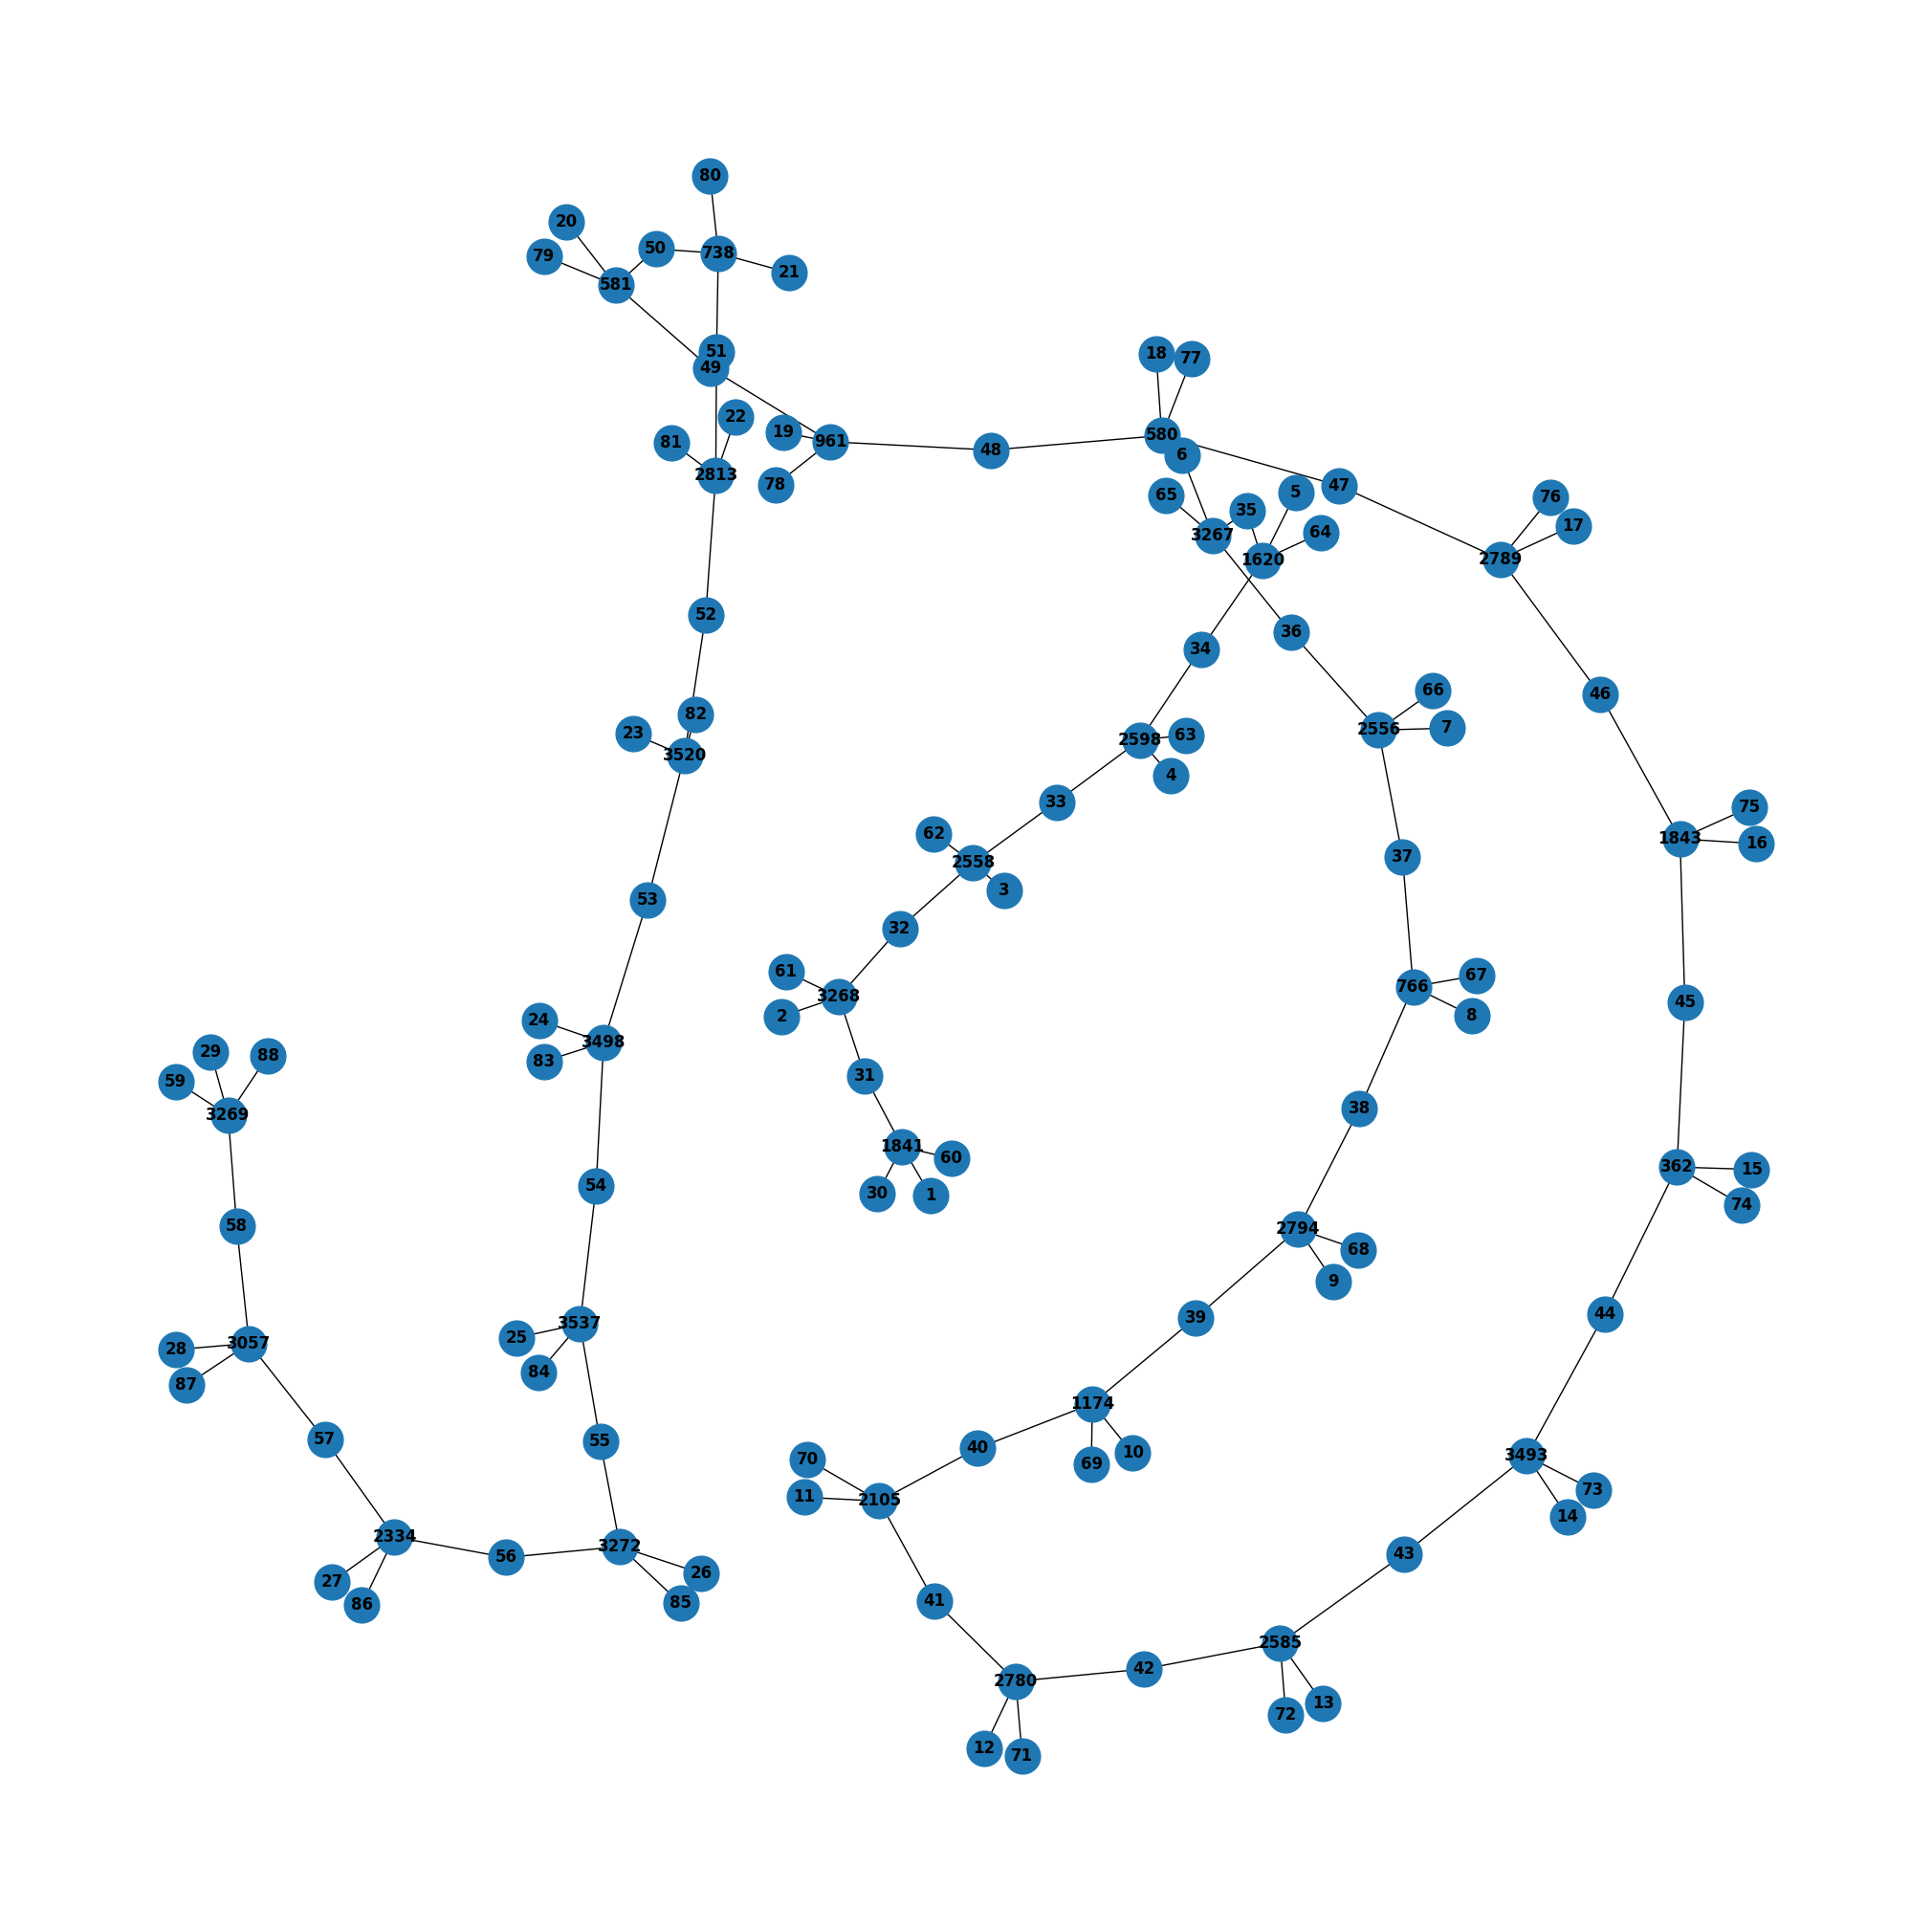

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_undirected_graph(edge_list):
    plt.figure(figsize=(20,20))
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(1000):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot, with_labels=True, font_weight="bold", node_size=700)
plot_undirected_graph(mygraph.edges)

#**Clustering**

We're employing KMeans, an unsupervised clustering algorithm, to cluster data points based on features extracted from movie attributes. Initially, we define indexers and one-hot encoders to convert categorical variables into numerical representations. Then, we assemble these features into a single vector. Next, we construct a pipeline that encapsulates these data transformations. By fitting this pipeline to our data, we generate a model. Subsequently, we apply this model to transform our dataset, resulting in a DataFrame with augmented features. Finally, we utilize KMeans clustering with a specified number of clusters (4) and a seed for reproducibility to group similar data points. The clustering results are then displayed, showcasing the assigned cluster for each data point. This process facilitates the discovery of inherent patterns and structures within the movie dataset, aiding in data-driven insights and decision-making.

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

color_indexer = StringIndexer(inputCol="color", outputCol="color_indexing", handleInvalid="skip")
language_indexer = StringIndexer(inputCol="language", outputCol="language_indexing", handleInvalid="skip")
content_rating_indexer = StringIndexer(inputCol="content_rating", outputCol="content_rating_indexing", handleInvalid="skip")
title_year_indexer = StringIndexer(inputCol="title_year", outputCol="title_year_indexing", handleInvalid="skip")

color_encoder = OneHotEncoder(inputCol="color_indexing", outputCol="color_encoded")
language_encoder = OneHotEncoder(inputCol="language_indexing", outputCol="language_encoded")
content_rating_encoder = OneHotEncoder(inputCol="content_rating_indexing", outputCol="content_rating_encoded")
title_year_encoder = OneHotEncoder(inputCol="title_year_indexing", outputCol="title_year_encoded")

assembler = VectorAssembler(inputCols=["color_encoded", "language_encoded", "content_rating_encoded", "title_year_encoded", "duration"],
                            outputCol="features")

pipeline = Pipeline(stages=[color_indexer, language_indexer, content_rating_indexer, title_year_indexer,
                            color_encoder, language_encoder, content_rating_encoder, title_year_encoder,
                            assembler])

model = pipeline.fit(data)

transformed_data = model.transform(data)

transformed_data.printSchema()

root
 |-- IMDB_high: integer (nullable = false)
 |-- color: string (nullable = true)
 |-- director_name: string (nullable = true)
 |-- num_critic_for_reviews: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- director_facebook_likes: integer (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- gross: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- movie_title: string (nullable = true)
 |-- cast_total_facebook_likes: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- content_rating: string (nullable = true)
 |-- budget: long (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- IMDB_user_reviews: integer (nullable = true)
 |-- IMDB_user_votes: integer (nullable = true)
 |-- IMDB_score: double (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- actor_2_name: string (nullable = true)

In [ ]:
kmeans=KMeans(featuresCol="features").setK(4).setSeed(123)
results=kmeans.fit(transformed_data).transform(transformed_data)
results.show(10)

+---------+-----+-----------------+----------------------+--------+-----------------------+----------------------+---------+--------------------+--------------+--------------------+-------------------------+--------+-------+--------------+---------+----------+-----------------+---------------+----------+----------------------+--------------------+----------------+----------------------+-------------------+----------------+--------+------+------+-----+-----+---------+-------+-----+-------+----+-------+-----+-----+---+-------+-----------+-------+------+---------+---------+------+-------+------+--------------+-----------------+-----------------------+-------------------+-------------+----------------+----------------------+------------------+--------------------+----------+
|IMDB_high|color|    director_name|num_critic_for_reviews|duration|director_facebook_likes|actor_1_facebook_likes|    gross|              genres|  actor_1_name|         movie_title|cast_total_facebook_likes|language|co

We're filtering the clustering results to isolate Cluster 1, which contains data points predicted to belong to the first cluster. By selecting the movie titles associated with this cluster, we reveal the movies grouped within Cluster 1. Additionally, we obtain the count of data points in Cluster 1 to understand its size and distribution. This analysis provides insights into the characteristics and composition of movies clustered together in the first group.

In [ ]:
cluster1=results.filter(results['prediction']==0)
cluster1.select('movie_title').show()
cluster1.count()

+--------------------+
|         movie_title|
+--------------------+
|How the Grinch St...|
|Mission: Impossib...|
|          Hollow Man|
|     Mission to Mars|
|Nutty Professor I...|
|         The 6th Day|
|   Battlefield Earth|
|          Red Planet|
|               X-Men|
|      Vertical Limit|
|         Unbreakable|
|             The Kid|
|       Lucky Numbers|
|               U-571|
|    Meet the Parents|
|       Shanghai Noon|
|  Me, Myself & Irene|
|    The Replacements|
|           The Beach|
|   Miss Congeniality|
+--------------------+
only showing top 20 rows



1109

We're isolating Cluster 2 from the clustering results, which consists of data points predicted to belong to the second cluster. By selecting the movie titles associated with this cluster, we unveil the movies grouped within Cluster 2. Additionally, we determine the count of data points in Cluster 2 to understand its size and distribution. This analysis provides insights into the characteristics and composition of movies clustered together in the second group.

In [ ]:
cluster2=results.filter(results['prediction']==1)
cluster2.select('movie_title').show()
cluster2.count()

+--------------------+
|         movie_title|
+--------------------+
|            Dinosaur|
|The Emperor's New...|
|The Road to El Do...|
|    Charlie's Angels|
|      102 Dalmatians|
|        Little Nicky|
|The Adventures of...|
|          Titan A.E.|
|           Supernova|
|The Flintstones i...|
|               Shaft|
|What Planet Are Y...|
|           Bedazzled|
|         Chicken Run|
|          Hanging Up|
|          Get Carter|
|     Isn't She Great|
|   Big Momma's House|
|         The Watcher|
|Rugrats in Paris:...|
+--------------------+
only showing top 20 rows



1518

We're filtering the clustering results to extract Cluster 3, comprising data points predicted to belong to the third cluster. By selecting the movie titles associated with this cluster, we uncover the movies grouped within Cluster 3. Additionally, we ascertain the count of data points in Cluster 3 to understand its size and distribution. This analysis provides insights into the characteristics and composition of movies clustered together in the third group.

In [ ]:
cluster3=results.filter(results['prediction']==2)
cluster3.select('movie_title').show()
cluster3.count()

+--------------------+
|         movie_title|
+--------------------+
|   The Perfect Storm|
|         The Patriot|
|Gone in Sixty Sec...|
|   What Lies Beneath|
|           Cast Away|
|       Thirteen Days|
|     What Women Want|
|       Space Cowboys|
|       Proof of Life|
|      The Family Man|
|The Legend of Bag...|
|       Almost Famous|
|     Erin Brockovich|
|   Finding Forrester|
|        Men of Honor|
|   Keeping the Faith|
|  Dancer in the Dark|
|  The House of Mirth|
|          Bamboozled|
|       The Contender|
+--------------------+
only showing top 20 rows



393

# **Conclusion**

In summary, our project delves into movie data analysis using PySpark, employing various methodologies to uncover insights into IMDB ratings and movie success factors. Using supervised learning models, we achieved 72.44% accuracy in predicting high or low IMDB ratings, empowering filmmakers with informed production decisions. Unsupervised learning techniques enabled us to cluster similar movies for personalized recommendations, while our exploration of actor-director relationships revealed collaboration patterns. Graph frame analysis highlighted industry stakeholder interconnectedness, emphasizing genre combinations' influence on audience reception. Overall, our research offers actionable insights for stakeholders to enhance decision-making and maximize movie success through data-driven strategies.